<a href="https://colab.research.google.com/github/alishermutalov/matplotlib-learning/blob/plt-branch/seaborn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0)
df.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


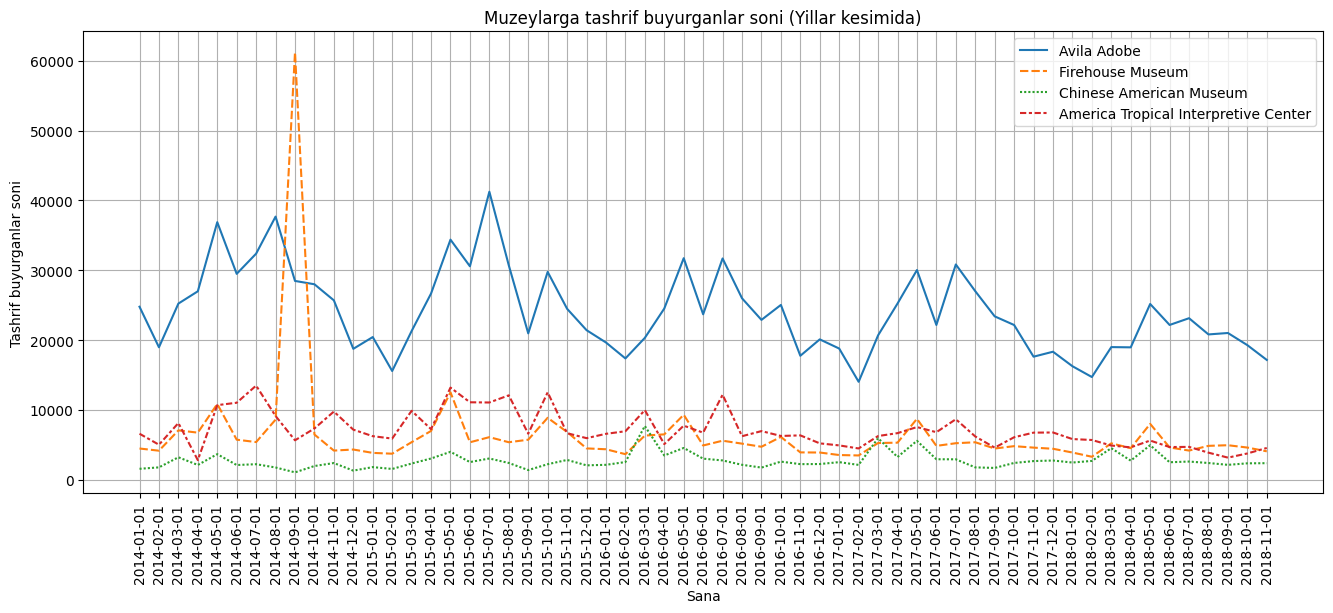

In [5]:
plt.figure(figsize=(16,6))
plt.title("Muzeylarga tashrif buyurganlar soni (Yillar kesimida)")
plt.xlabel("Sana")
plt.ylabel("Tashrif buyurganlar soni")
sns.lineplot(data=df)
plt.grid()
plt.xticks(rotation=90)
plt.show()


In [7]:
df2 = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/uzbekistan.csv", index_col=0)
df2

,Maydoni (kv.km),Aholisi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0
Namangan viloyati,7900.0,1862000.0
Navoiy viloyati,110800.0,767500.0
Qashqadaryo viloyati,28400.0,2029000.0
Qoraqalpogʻiston Respublikasi,160000.0,1200000.0


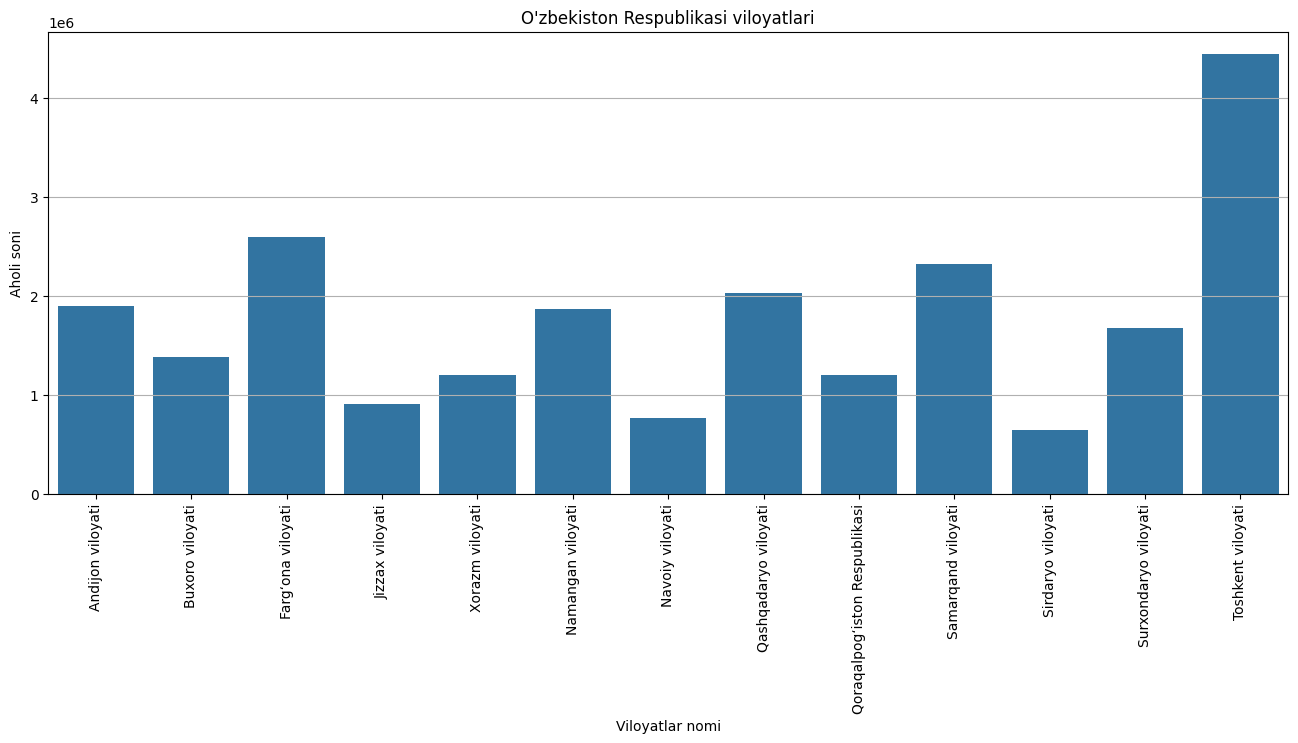

In [9]:
plt.figure(figsize=(16,6))
plt.title("O'zbekiston Respublikasi viloyatlari")
plt.xlabel("Viloyatlar nomi")
plt.ylabel("Aholi soni")
plt.grid()
plt.xticks(rotation=90)
sns.barplot(x=df2.index, y=df2['Aholisi'])
plt.show()

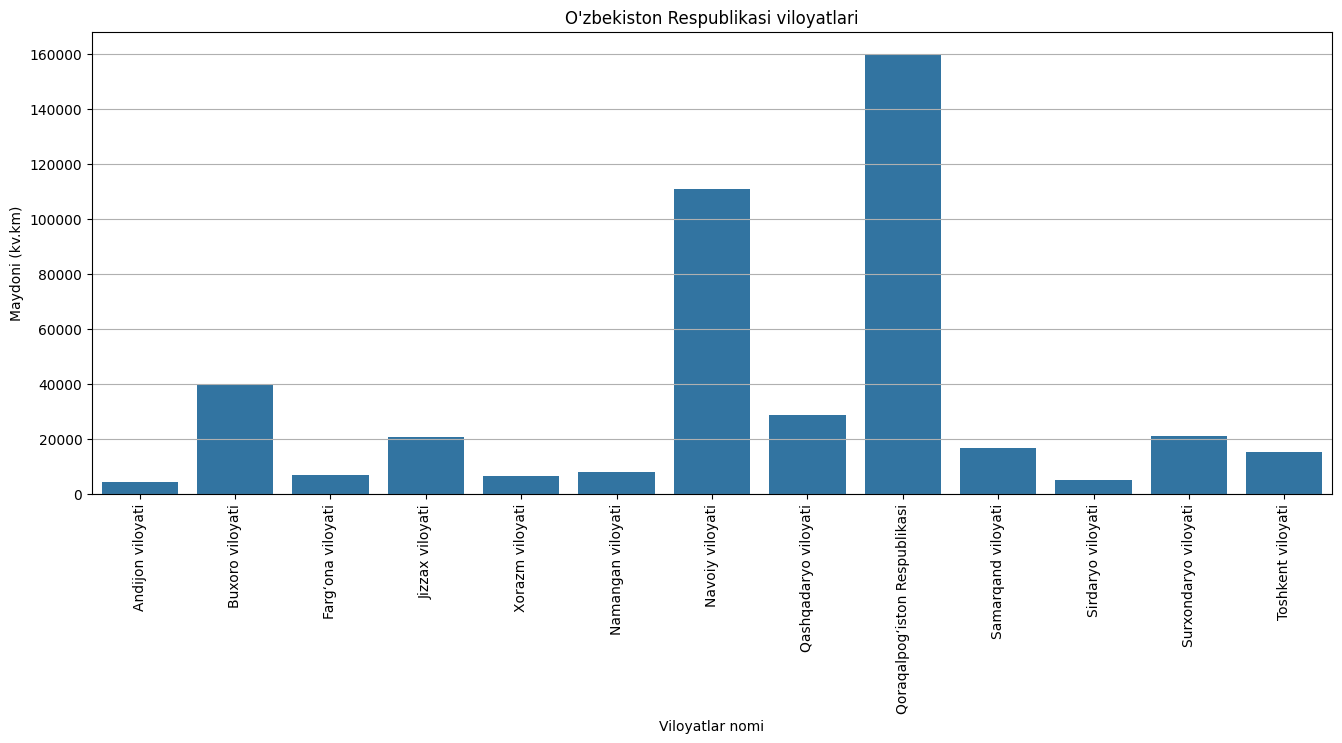

In [10]:
plt.figure(figsize=(16,6))
plt.title("O'zbekiston Respublikasi viloyatlari")
plt.xlabel("Viloyatlar nomi")
plt.ylabel("Maydoni (kv.km)")
plt.grid()
plt.xticks(rotation=90)
sns.barplot(x=df2.index, y=df2['Maydoni (kv.km)'])
plt.show()

In [11]:
df3 = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0], usecols=[0,1])
df3.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [13]:
type(df3.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
df3['month'] = [i.month for i in df3.index]
df3['year'] = [i.year for i in df3.index]
df3.head()

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [16]:
df3.groupby(['month','year']).max().head(10)

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718

In [18]:
df_m = df3.groupby(['month','year']).max().unstack(level=0)
df_m.head()

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

<Axes: xlabel='None-month', ylabel='year'>

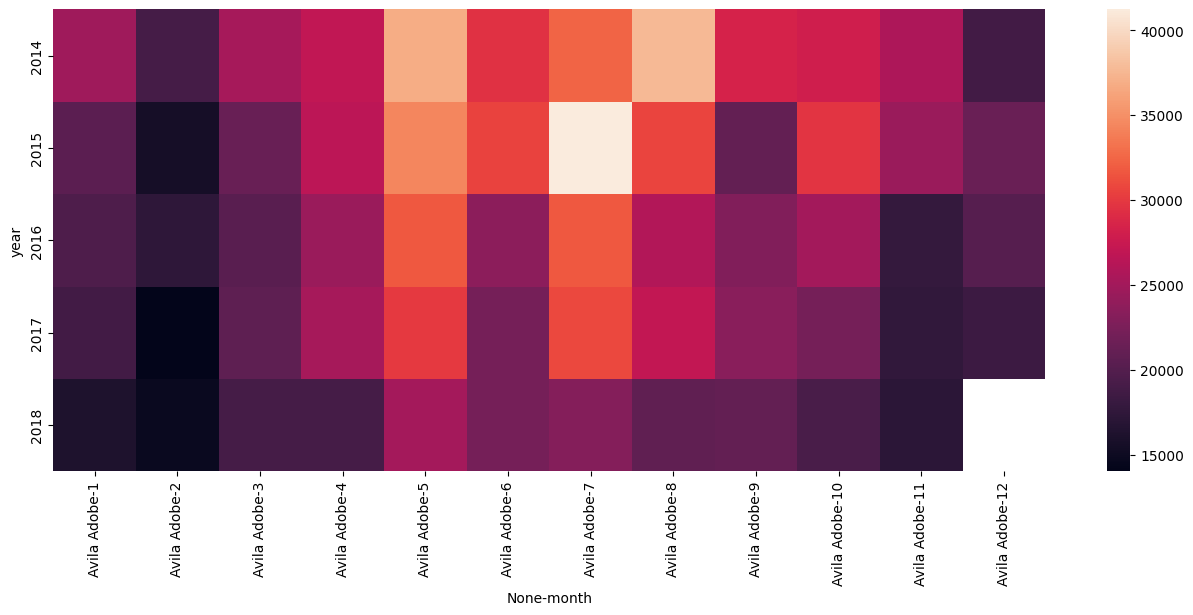

In [20]:
plt.figure(figsize=(16,6))
sns.heatmap(df_m)

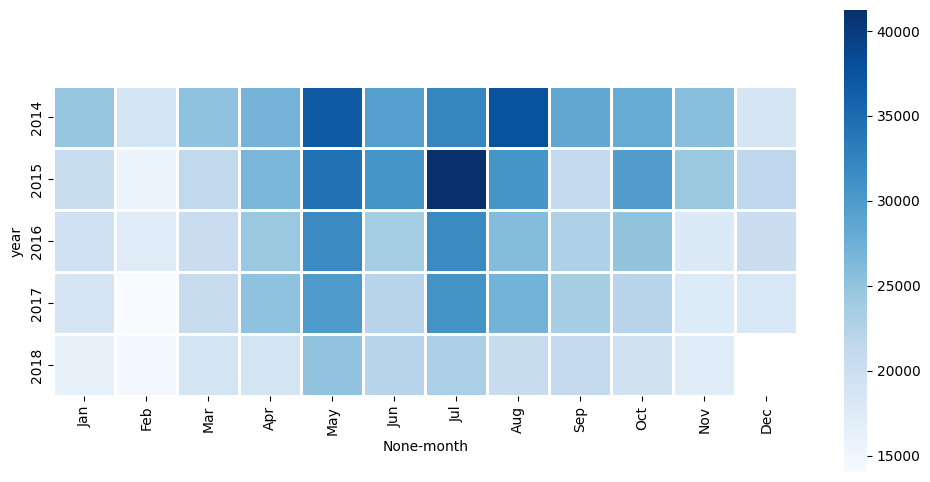

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df_m, cmap='Blues',square=True, linewidths=1)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.show()